In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Visualizing the Image Data

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

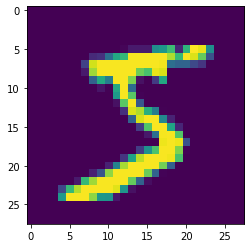

In [7]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,10)

In [17]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.shape

(28, 28)

In [23]:
scaled_single.max()

1.0

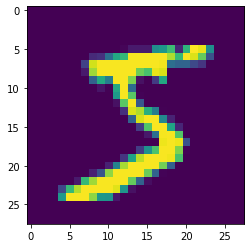

In [24]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

## Training the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, 
                                     MaxPool2D, Flatten)

In [32]:
model = Sequential()

# CONVOLUTIONAL LAYER()
model.add(Conv2D(filters=32, kernel_size=(4,4),
                 input_shape=(28,28,1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (WE CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(units=128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # we can add in additional metrics

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Train the Model